# ***IMPORTING THE REQUIRED LIBRARIES AND LOADING THE DATASE***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

***READING THE DATASET***

In [3]:
df=pd.read_csv(r'WSN-DS.csv')
df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [4]:
df.tail()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,Normal
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,Normal
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,Normal
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,Normal
374660,202041,1025,0,202100,0.00000,0,5,0,0,0,0,4,7,689,7,115.00407,0,1.01325,Normal


# ***DATA MANIPULATION TECHNIQUES***

In [5]:
#Let's print the column name
df.columns

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy',
       'Attack type'],
      dtype='object')

In [6]:
# shape of the dataset
df.shape

(374661, 19)

In [7]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
374656    False
374657    False
374658    False
374659    False
374660    False
Length: 374661, dtype: bool

In [8]:
#Let's print the total number of duplicated value
df.duplicated().sum()

8873

In [9]:
#Let's print the unique values in our dataset
df.nunique()

 id                 11120
 Time                 196
 Is_CH                  2
 who CH              7088
 Dist_To_CH         13956
 ADV_S                 85
 ADV_R                 31
 JOIN_S                 2
 JOIN_R               101
 SCH_S                 95
 SCH_R                  2
Rank                  100
 DATA_S               192
 DATA_R              1345
 Data_Sent_To_BS      237
 dist_CH_To_BS        305
 send_code             16
Expaned Energy      69352
Attack type             5
dtype: int64

In [10]:
#Let's print the data types in our data
df.dtypes

 id                   int64
 Time                 int64
 Is_CH                int64
 who CH               int64
 Dist_To_CH         float64
 ADV_S                int64
 ADV_R                int64
 JOIN_S               int64
 JOIN_R               int64
 SCH_S                int64
 SCH_R                int64
Rank                  int64
 DATA_S               int64
 DATA_R               int64
 Data_Sent_To_BS      int64
 dist_CH_To_BS      float64
 send_code            int64
Expaned Energy      float64
Attack type          object
dtype: object

In [11]:
#descriptive statistics summary
df.describe

<bound method NDFrame.describe of             id   Time   Is_CH   who CH   Dist_To_CH   ADV_S   ADV_R   JOIN_S  \
0       101000     50       1   101000      0.00000       1       0        0   
1       101001     50       0   101044     75.32345       0       4        1   
2       101002     50       0   101010     46.95453       0       4        1   
3       101003     50       0   101044     64.85231       0       4        1   
4       101004     50       0   101010      4.83341       0       4        1   
...        ...    ...     ...      ...          ...     ...     ...      ...   
374656  201096   1003       0   201051      6.98337       0       5        1   
374657  201097   1003       0   201037     29.32867       0       5        1   
374658  201098   1003       0   201095     18.51963       0       5        1   
374659  201099   1003       0   201051      8.55001       0       5        1   
374660  202041   1025       0   202100      0.00000       0       5        0   

     

In [12]:
#Let's get the overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [13]:
#Let's check the total number of null values present in our dataset
df.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64

***IMPLEMENTING EXPLORATOTARY DATA ANALYSIS***

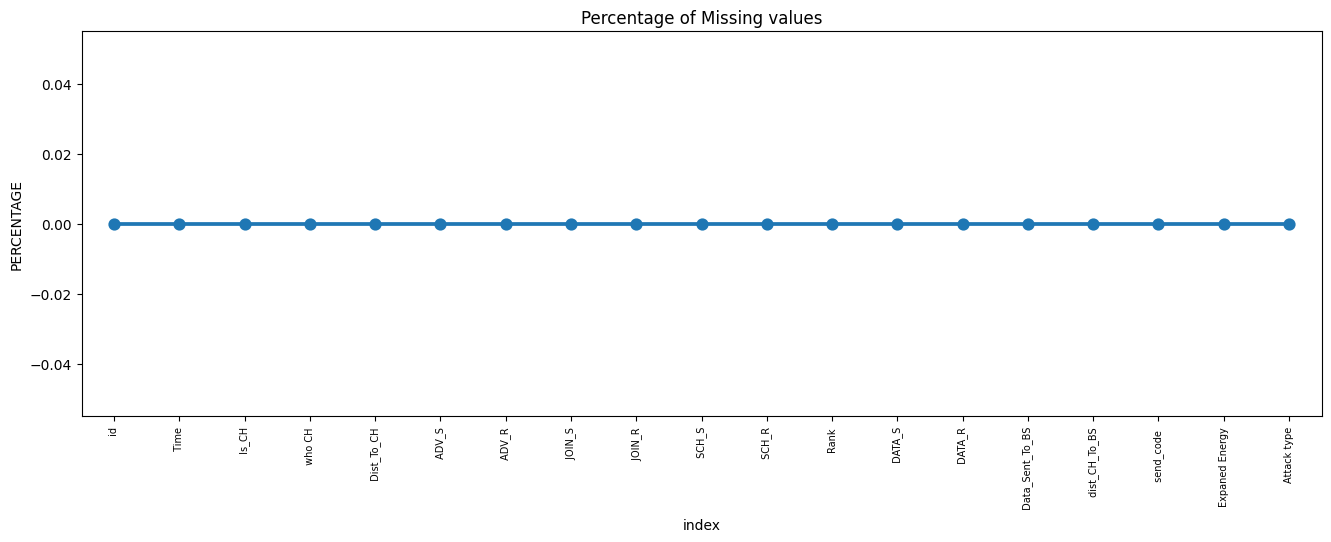

In [14]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Percentage of Missing Values Plot 

Overview: This is a scatter plot representing the percentage of missing values for each feature in the dataset.

X-axis (index): Lists all the features in the dataset, such as Id, Time, Is_CH, who_CH, Dist_To_CH, ADV_S, ADV_R, and so on.

Y-axis (Percentage): The Y-axis displays the percentage of missing values, which appears to be zero for all the features, indicating that there are no missing values in any of the columns.

Insight: Each point on the graph represents a feature, and the line of points across the zero value confirms that none of the features have missing values.

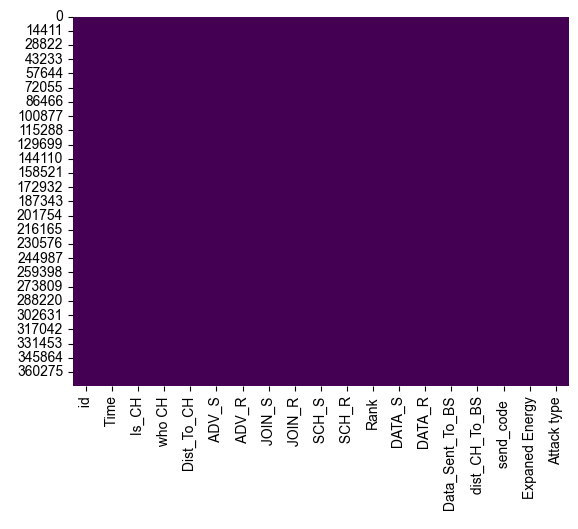

In [15]:
# Create heatmap with missing values in DataFrame highlighted
sns.heatmap(df.isnull(), cbar=False,cmap='viridis')
sns.set(rc={'figure.figsize':(10,5)})

Missing Values Heatmap 

Overview: This is a heatmap showing missing values in the dataset.

X-axis (Feature Names): Each column represents a feature (such as id, Time, Is_CH, Dist_To_CH, etc.).

Y-axis (Row Indices): The rows represent the sample indices from the dataset.

Color Representation: The entire heatmap is a solid color (deep purple), indicating that there are no missing values in any of the features. In a typical missing values heatmap, missing values are often highlighted in a distinct color.

Insight: The absence of variations in color across the heatmap confirms there are no missing values across all samples and features.

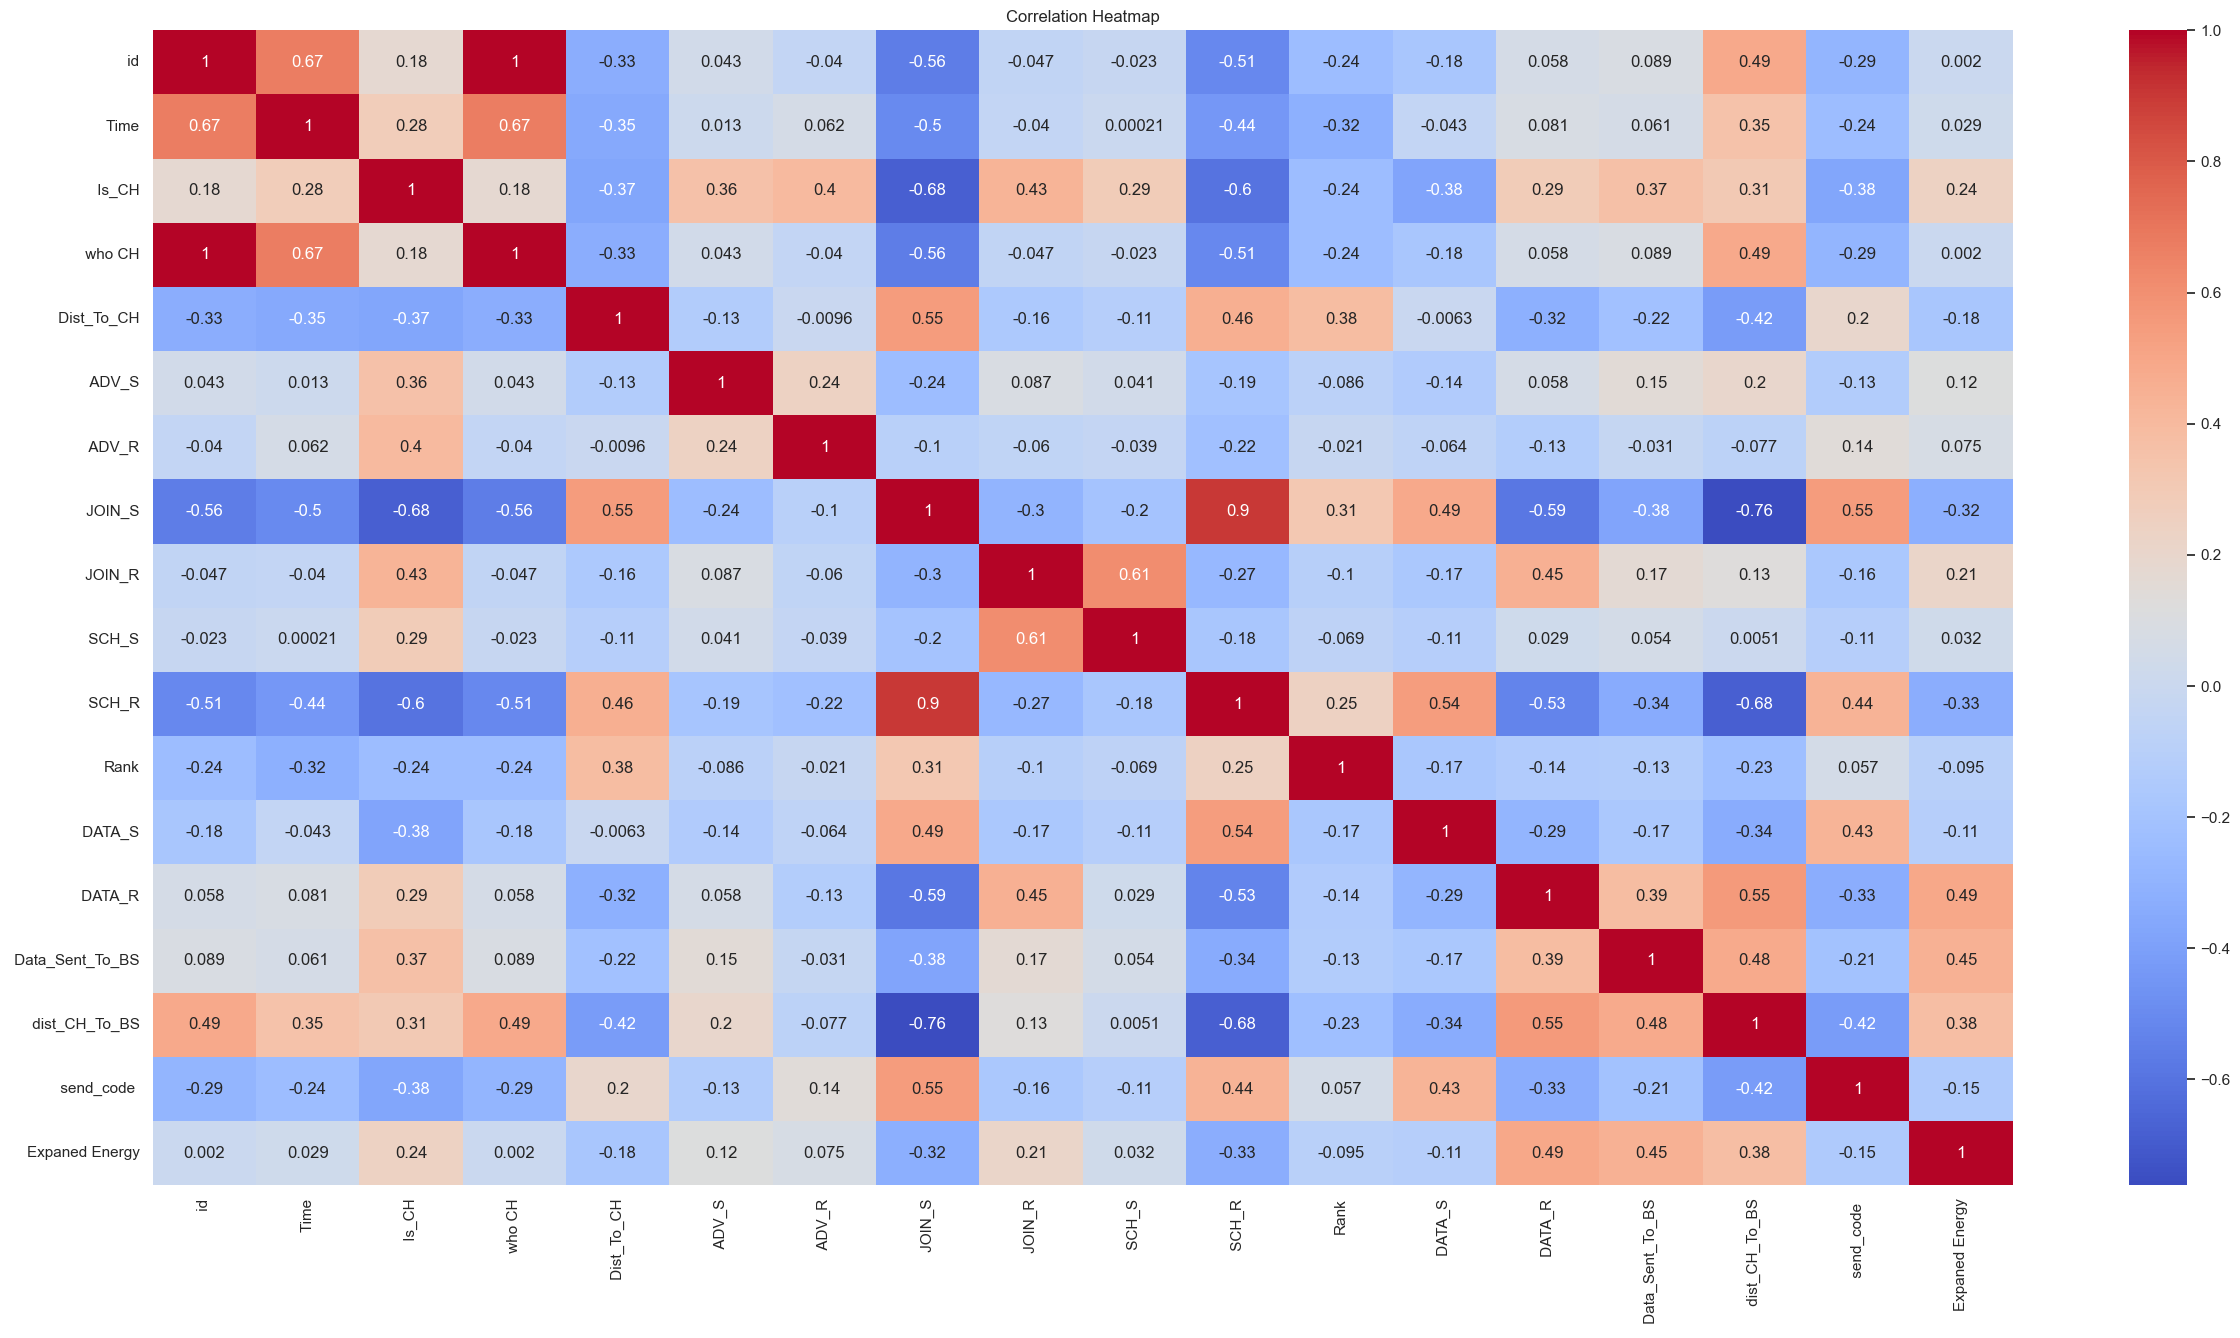

In [16]:
# Assuming 'df' is your DataFrame
# Remove non-numeric columns if present
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set the style and figure size
sns.set(rc={'figure.figsize':(30, 15)})

# Create the heatmap with annotations and color map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


Correlation Heatmap 

Overview: This is a correlation heatmap that visualizes the relationships between different features in the dataset.

X-axis and Y-axis: Both axes represent the features, with the intersection of a row and column showing the correlation between two features.

Color Scale: The color ranges from blue to red:
Dark Blue: Indicates a strong negative correlation (close to -1).
Light Blue/Gray: Indicates weak or no correlation (close to 0).
Dark Red: Indicates a strong positive correlation (close to +1).

Key Correlations:
Features such as JOIN_S and who CH have a strong positive correlation (dark red).
Dist_To_CH and Is_CH exhibit a negative correlation (dark blue).
Other relationships exhibit varying levels of positive or negative correlation.

Insight: The correlation heatmap provides insight into how the features are related. High positive correlations (close to 1) indicate that as one feature increases, so does the other. High negative correlations (close to -1) indicate that as one feature increases, the other decreases. This helps in feature selection and understanding dependencies in the dataset.

In [17]:
df.value_counts('Attack type')

Attack type
Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: count, dtype: int64

In [18]:
# Initialize LabelEncoder
le = LabelEncoder()

# Loop through each column in the DataFrame
for col in df.columns:
    # Check if the data type of the column is object
    if df[col].dtype == 'object':
        # Fit label encoder and transform the column
        df[col] = le.fit_transform(df[col])

In [19]:
df.value_counts('Attack type')

Attack type
3    340066
2     14596
0     10049
4      6638
1      3312
Name: count, dtype: int64

# ***SPLITTING THE DATASET***

In [20]:
x=df.drop('Attack type',axis=1)
y=df['Attack type']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 101, test_size = 0.3)

In [22]:
x_train

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
121228,112070,603,0,112030,49.96494,0,2,1,0,0,1,44,21,0,0,0.00000,2,0.04094
367449,111020,553,0,111050,15.01474,0,8,1,0,0,1,1,120,0,0,0.00000,8,0.20029
237055,115016,753,0,115014,16.45977,0,4,1,0,0,1,4,45,0,0,0.00000,4,0.07881
225410,104095,203,0,104040,20.59323,0,7,1,0,0,1,2,103,0,0,0.00000,6,0.17298
102452,702021,2953,0,702100,0.00000,0,0,0,0,0,0,0,13,377,13,85.04317,0,0.63749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311895,307069,2103,0,307018,11.83155,0,6,1,0,0,1,1,80,0,0,0.00000,4,0.13483
136767,201039,1003,0,201061,43.03199,0,7,1,0,0,1,24,35,0,17,95.16531,3,0.06390
204614,114065,703,0,114002,56.46008,0,4,1,0,0,1,18,27,0,0,0.00000,1,0.05225
214539,201061,1053,0,201005,13.18598,0,3,1,0,0,1,22,32,0,0,0.00000,1,0.05723


In [23]:
y_train


121228    3
367449    3
237055    3
225410    3
102452    3
         ..
311895    3
136767    3
204614    3
214539    3
176991    3
Name: Attack type, Length: 262262, dtype: int32

In [24]:
x_test

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
63688,203079,1153,0,203100,51.00302,0,1,1,0,0,1,1,15,0,0,0.00000,1,0.55098
216589,308020,2303,0,308100,8.87721,0,9,1,0,0,1,6,111,0,0,0.00000,8,0.18415
133344,207051,1303,0,207100,19.20478,0,9,1,0,0,1,8,80,0,0,0.00000,4,0.13507
145749,704048,2903,1,704048,0.00000,1,26,0,0,0,0,0,0,0,4,137.14723,0,0.04534
166835,207037,1353,0,207016,30.63174,0,7,1,0,0,1,4,33,0,0,0.00000,6,0.06010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226367,114052,703,0,114079,27.79939,0,7,1,0,0,1,10,48,0,0,0.00000,4,0.08564
165387,112085,603,0,112073,36.37526,0,4,1,0,0,1,14,65,0,0,0.00000,3,0.11281
329251,101097,53,0,101001,30.27664,0,5,1,0,0,1,14,39,0,0,0.00000,1,0.06463
139331,107020,353,0,107005,7.32385,0,6,1,0,0,1,13,39,0,0,0.00000,1,0.06832


In [25]:
y_test

63688     3
216589    3
133344    3
145749    2
166835    3
         ..
226367    3
165387    3
329251    3
139331    3
260506    3
Name: Attack type, Length: 112399, dtype: int32

***PROPOSED ALGORITHMS***

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print('Accuracy of Decision Tree Classifier is', dt_accuracy)
print('=============================')
print("Confusion Matrix:")
print(cm_dt)
print('=============================')
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Accuracy of Decision Tree Classifier is 0.9949020898762444
Confusion Matrix:
[[  3029      0     32      0      1]
 [     0    918      0     52      0]
 [    35      0   4283     53      3]
 [     3     41     48 101750    177]
 [     1      0      2    125   1846]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3062
           1       0.96      0.95      0.95       970
           2       0.98      0.98      0.98      4374
           3       1.00      1.00      1.00    102019
           4       0.91      0.94      0.92      1974

    accuracy                           0.99    112399
   macro avg       0.97      0.97      0.97    112399
weighted avg       0.99      0.99      0.99    112399



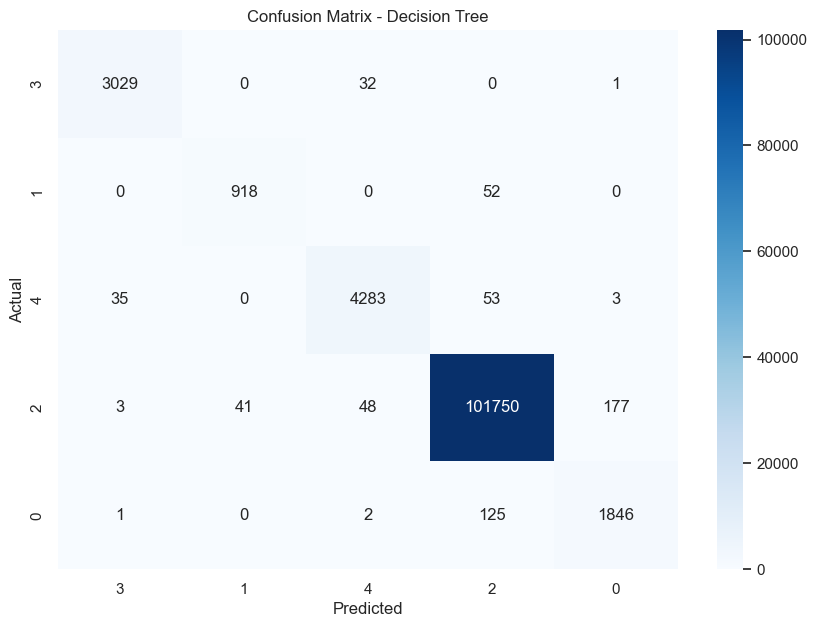

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=df['Attack type'].unique(), yticklabels=df['Attack type'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


Accuracy of Random Forest Classifier is 0.9970729276950863
Confusion Matrix:
[[  3051      0     11      0      0]
 [     0    962      0      8      0]
 [    36      0   4310     27      1]
 [     1     69     33 101910      6]
 [     1      0      0    136   1837]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3062
           1       0.93      0.99      0.96       970
           2       0.99      0.99      0.99      4374
           3       1.00      1.00      1.00    102019
           4       1.00      0.93      0.96      1974

    accuracy                           1.00    112399
   macro avg       0.98      0.98      0.98    112399
weighted avg       1.00      1.00      1.00    112399



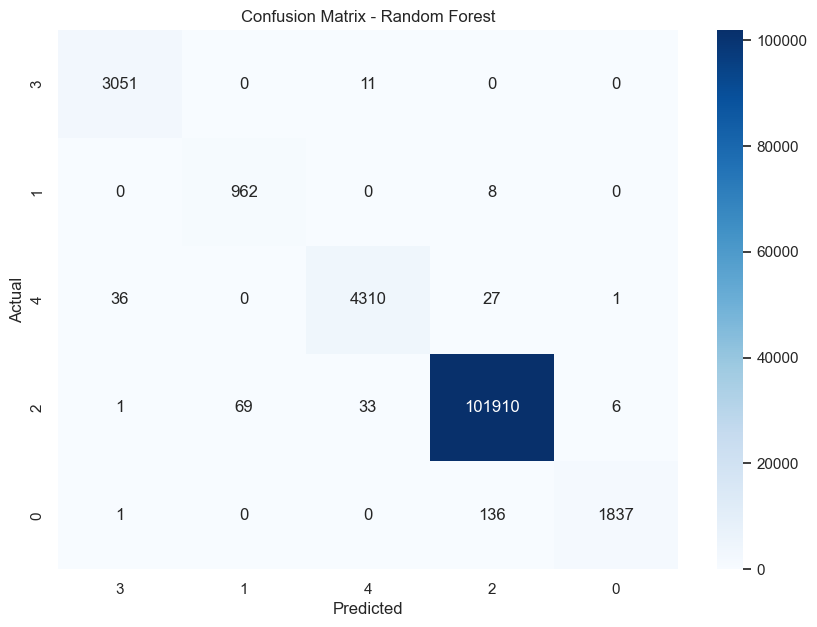

In [28]:
from sklearn.ensemble import RandomForestClassifier


# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print('Accuracy of Random Forest Classifier is', rf_accuracy)
print('=============================')
print("Confusion Matrix:")
print(cm_rf)
print('=============================')
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=df['Attack type'].unique(), yticklabels=df['Attack type'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [29]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression is 0.9304976022918353
Confusion Matrix:
[[  1834      0      3   1115    110]
 [     4     33    471    462      0]
 [  1435     23   1486   1372     58]
 [   101    147    925 100629    217]
 [   856     90     91    332    605]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.60      0.50      3062
           1       0.11      0.03      0.05       970
           2       0.50      0.34      0.40      4374
           3       0.97      0.99      0.98    102019
           4       0.61      0.31      0.41      1974

    accuracy                           0.93    112399
   macro avg       0.53      0.45      0.47    112399
weighted avg       0.92      0.93      0.92    112399



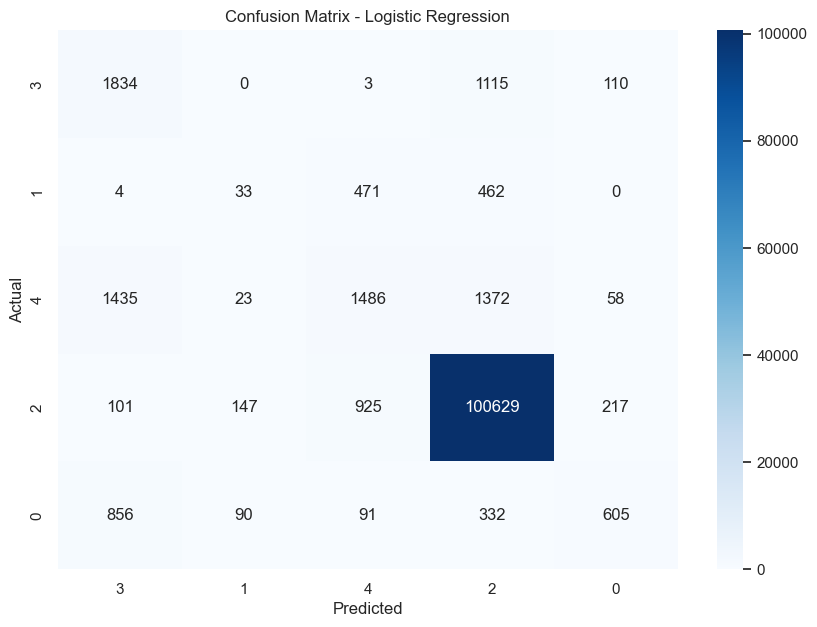

In [31]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(x_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print('Accuracy of Logistic Regression is', lr_accuracy)
print('=============================')
print("Confusion Matrix:")
print(cm_lr)
print('=============================')
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=df['Attack type'].unique(), yticklabels=df['Attack type'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

***EXISTING ALGORITHMS***

In [35]:
from sklearn.metrics import accuracy_score

# Dictionary to hold models and their predictions
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    #'MLP': MLPClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    #'Stacking Classifier': StackingClassifier(
       # estimators=base_models, final_estimator=LogisticRegression()),
   # 'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42),
   # 'AdaBoost': AdaBoostClassifier(random_state=42)
}
# Train each model
for name, model in models.items():
    model.fit(x_train, y_train)

In [58]:
# Train models and make predictions
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C

# ***PREDICTION***

In [60]:
abc=[207046,1303,1,207046,0.0,1,5,0,7,7,0,0,0,840,120,152.31704,0,2.61345]
result=rf_model.predict([abc])
result=result[0]
if result==0:
    print(" The Attack_type : normal ")
elif result==1:
    print(" The Attack_type : Grayhole ")
elif result==2:
    print(" The Attack_type : Blackhole ")
elif result==3:
    print(" The Attack_type : tdma ")
else:
    print(" The Attack_type : Flooding ")

 The Attack_type : Flooding 


C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [61]:
abc=[110009,503,1,110009,0.0,1,6,0,8,1,0,0,0,888,0,0.0,0,0.00725]
result=rf_model.predict([abc])
result=result[0]
if result==0:
    print(" The Attack_type : normal ")
elif result==1:
    print(" The Attack_type : Grayhole ")
elif result==2:
    print(" The Attack_type : Blackhole ")
elif result==3:
    print(" The Attack_type : tdma ")
else:
    print(" The Attack_type : Flooding ")

 The Attack_type : normal 


C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [62]:
abc=[601088,2953,1,601100,0.0,1,27,0,0,0,0,0,0,0,1,168.32642,0,0.05187]
result=rf_model.predict([abc])
result=result[0]
if result==0:
    print(" The Attack_type : normal ")
elif result==1:
    print(" The Attack_type : Grayhole ")
elif result==2:
    print(" The Attack_type : Blackhole ")
elif result==3:
    print(" The Attack_type : tdma ")
else:
    print(" The Attack_type : Flooding ")

 The Attack_type : Blackhole 


C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [63]:
abc=[101058,53,1,101058,0.0,15,0,0,27,1,0,0,0,1215,45,145.47059,0,2.50668]
result=rf_model.predict([abc])
result=result[0]
if result==0:
    print(" The Attack_type : normal ")
elif result==1:
    print(" The Attack_type : Grayhole ")
elif result==2:
    print(" The Attack_type : Blackhole ")
elif result==3:
    print(" The Attack_type : tdma ")
else:
    print(" The Attack_type : Flooding ")

 The Attack_type : Grayhole 


C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
abc=[101090,53,0,101054,170.71234,0,28,1,0,0,1,12,35,0,0,0.0,13,0.20924]
result=rf_model.predict([abc])
result=result[0]
if result==0:
    print(" The Attack_type : normal ")
elif result==1:
    print(" The Attack_type : Grayhole ")
elif result==2:
    print(" The Attack_type : Blackhole ")
elif result==3:
    print(" The Attack_type : tdma ")
else:
    print(" The Attack_type : Flooding ")

 The Attack_type : tdma 


C:\Users\0931\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
